## Introduction

The aim of this notebook is to analyse and clean up the data, gathered in the previous steps.

## Initial setup

In [21]:
import numpy as np
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#show every column
pd.set_option('display.max_columns', None)

## Joining the data

First of all, since we have three datasets, let's join them all into one big dataset.

In [22]:
data_houses = pd.read_csv("data/dataset_houses_with_population.csv")
data_houses['Building type'] = 0
data_apartments = pd.read_csv("data/dataset_apartments_with_population.csv")
data_apartments['Building type'] = 1
data_sharehouses = pd.read_csv("data/dataset_sharehouses_with_population.csv")
data_sharehouses['Building type'] = 2

data = pd.concat([data_houses, data_apartments, data_sharehouses])
data['id'] = np.arange(start = 1, stop = len(data) + 1, step = 1)

data = data.drop(columns="Unnamed: 0")
#data

## Exploratory analysis

We will now do a quick exploratory data analysis.

In [23]:
# Describe the numeric attributes.
data.describe()

,Price,Rooms,Number of floors,Bedrooms,Built in year,Register number,population,Building type,id
count,7.208000e+03,7057.000000,2655.000000,1644.000000,6136.000000,8.660000e+02,7433.000000,7433.000000,7433.000000
mean,1.731437e+05,3.405696,1.889642,3.259732,1985.422588,8.405146e+06,3068.412350,0.751379,3717.000000
std,2.241615e+05,2.383852,0.910184,1.795052,62.226690,1.690184e+07,4697.483722,0.567147,2145.866608
min,5.000000e+03,1.000000,1.000000,1.000000,1.000000,1.600000e+01,0.000000,0.000000,1.000000
25%,6.000000e+04,2.000000,1.000000,3.000000,1968.000000,1.782114e+06,75.000000,0.000000,1859.000000
50%,1.280000e+05,3.000000,2.000000,3.000000,1992.000000,3.047403e+06,1164.000000,1.000000,3717.000000
75%,2.150000e+05,4.000000,2.000000,4.000000,2021.000000,9.863150e+06,4282.000000,1.000000,5575.000000
max,6.950000e+06,47.000000,19.000000,33.000000,2105.000000,1.208426e+08,26147.000000,2.000000,7433.000000


In [24]:
data.describe(include=[object])

,Title,Description,Link,Location,Total area,Condition,Readiness,Ground area,Cadastre no.,Energy mark,Lisainfo,Neighbourhood,Ownership,Notify about incorrect advertisement,Kitchen,Sanitary arrangements,Heating and ventilation,Communications and security,Data from realestate book,Additional information,This floor/Number of floors,Kulud suvel/talvel
count,7433,7433,7433,7266,7292,6570,1174,2077,3926,5464,6012,4075,6496,3642,4692,5768,5968,4967,4122,547,4545,448
unique,6205,2607,7433,5318,2019,8,5,1569,2853,10,4624,1666,7,1,392,1296,606,586,1,476,161,234
top,"Apartment for sale, 2 rooms, Järve 2, Kristiin...","Apartment ownership, stone house",https://www.kv.ee/muua-vana-talukoht-looduskau...,"59.3097965,24.8367254",120 m²,all brand-new,ready,600 m²,79301:001:0984,Missing,"ventilation, parquet, lift, parking free parking",roads paved roads,apartment ownership,Notify about incorrect advertisement,open kitchen,shower,central heating,frontdoor locked,Data from realestate book,"underground garage, box-room, new electricity,...",1/2,50 € / 100 €
freq,21,1942,1,44,51,2226,1036,24,36,1581,83,269,4273,3642,666,384,1855,427,4122,20,436,18


In [25]:
data.columns

Index(['Title', 'Description', 'Link', 'Location', 'Price', 'Rooms',
       'Total area', 'Number of floors', 'Condition', 'Readiness',
       'Ground area', 'Cadastre no.', 'Energy mark', 'Lisainfo',
       'Neighbourhood', 'Bedrooms', 'Built in year', 'Ownership',
       'Notify about incorrect advertisement', 'Kitchen',
       'Sanitary arrangements', 'Heating and ventilation',
       'Communications and security', 'Data from realestate book',
       'Register number', 'Additional information',
       'This floor/Number of floors', 'Kulud suvel/talvel', 'population',
       'Building type', 'id'],
      dtype='object')

## Cleaning the data

First, drop the columns which are useless for predicting the prices. Apart from the obvious ones, drop also the summer/winter costs because there are so few samples.

In [26]:
data.drop(columns=["Title", "Description", "Link", "Cadastre no.", "Data from realestate book", "Notify about incorrect advertisement", "Kulud suvel/talvel"], inplace=True)

data.describe(include=[object])
data.columns

,Location,Total area,Condition,Readiness,Ground area,Energy mark,Lisainfo,Neighbourhood,Ownership,Kitchen,Sanitary arrangements,Heating and ventilation,Communications and security,Additional information,This floor/Number of floors
count,7266,7292,6570,1174,2077,5464,6012,4075,6496,4692,5768,5968,4967,547,4545
unique,5318,2019,8,5,1569,10,4624,1666,7,392,1296,606,586,476,161
top,"59.3097965,24.8367254",120 m²,all brand-new,ready,600 m²,Missing,"ventilation, parquet, lift, parking free parking",roads paved roads,apartment ownership,open kitchen,shower,central heating,frontdoor locked,"underground garage, box-room, new electricity,...",1/2
freq,44,51,2226,1036,24,1581,83,269,4273,666,384,1855,427,20,436


Index(['Location', 'Price', 'Rooms', 'Total area', 'Number of floors',
       'Condition', 'Readiness', 'Ground area', 'Energy mark', 'Lisainfo',
       'Neighbourhood', 'Bedrooms', 'Built in year', 'Ownership', 'Kitchen',
       'Sanitary arrangements', 'Heating and ventilation',
       'Communications and security', 'Register number',
       'Additional information', 'This floor/Number of floors', 'population',
       'Building type', 'id'],
      dtype='object')

## Separating features

Some features are actually a combination of multiple different features. In order to succesfully train on this data, these features will need to be separated.

### "Lisainfo"

First, what are the unique feature values in the column "Lisainfo".

In [27]:
def find_unique_features(dataset, column):
    unique_features = set()

    for entry in dataset[column].unique():
        if not pd.isna(entry):
            features = entry.strip().split(", ")
            #print(features)
            unique_features.update(features)

    return unique_features

unique_features = find_unique_features(data, "Lisainfo")
unique_features

{'3*380V',
 'TV-set',
 'balcony',
 'balcony ',
 'balcony 0.5 m²',
 'balcony 0.9 m²',
 'balcony 1 m²',
 'balcony 1.4 m²',
 'balcony 1.5 m²',
 'balcony 1.6 m²',
 'balcony 1.8 m²',
 'balcony 10 m²',
 'balcony 10.0 m²',
 'balcony 10.2 m²',
 'balcony 10.3 m²',
 'balcony 10.4 m²',
 'balcony 10.5 m²',
 'balcony 10.6 m²',
 'balcony 10.7 m²',
 'balcony 10.8 m²',
 'balcony 10.9 m²',
 'balcony 11 m²',
 'balcony 11.1 m²',
 'balcony 11.2 m²',
 'balcony 11.4 m²',
 'balcony 11.5 m²',
 'balcony 11.6 m²',
 'balcony 11.7 m²',
 'balcony 11.8 m²',
 'balcony 12 m²',
 'balcony 12.1 m²',
 'balcony 12.2 m²',
 'balcony 12.3 m²',
 'balcony 12.4 m²',
 'balcony 12.5 m²',
 'balcony 12.6 m²',
 'balcony 12.7 m²',
 'balcony 12.8 m²',
 'balcony 12.9 m²',
 'balcony 13 m²',
 'balcony 13.1 m²',
 'balcony 13.2 m²',
 'balcony 13.3 m²',
 'balcony 13.4 m²',
 'balcony 13.5 m²',
 'balcony 13.6 m²',
 'balcony 13.8 m²',
 'balcony 13.9 m²',
 'balcony 14 m²',
 'balcony 14.1 m²',
 'balcony 14.2 m²',
 'balcony 14.3 m²',
 'balcony 14

Extract numeric features from "Lisainfo"

In [28]:
data_balcony = []
data_balcony_size = []

for i in data["Lisainfo"].values:
    balcony = 0 #Base values
    balcony_size = 0.0
    
    if not pd.isna(i):
        features = i.strip().split(", ")
        
        for feature in features:
            if feature.find("balcony") == 0:
                balcony = 1
                balcony_el = feature.strip().split()
                if len(balcony_el) > 1:
                    balcony_size = float(balcony_el[1])
                    
    data_balcony.append(balcony)
    data_balcony_size.append(balcony_size)

data["Balcony"] = data_balcony
data["Balcony size"] = data_balcony_size

In [29]:
#Probably don't care about that feature
data_dist_from_Tallinn = []

for i in data["Lisainfo"].values:
    dist_from_Tallinn = 0.0
    
    if not pd.isna(i):
        features = i.strip().split(", ")
        
        for feature in features:
            if feature.find("distance from Tallinn") != -1:
                dist_from_Tallinn = float(feature.strip().split()[3])
    data_dist_from_Tallinn.append(dist_from_Tallinn)

data["Distance from Tallinn"] = data_dist_from_Tallinn

Extract categorical features from "Lisainfo".

In [30]:
data_addition = []

for i in data["Lisainfo"].values:
    current = np.nan

    if not pd.isna(i):
        features = i.strip().split(", ")

        for feature in features:
            if feature.find("parking") != -1:
                current = ' '.join(feature.strip().split()[1:-1])
    data_addition.append(current)

data["Parking"] = data_addition

In [31]:
data_addition = []

for i in data["Lisainfo"].values:
    current = np.nan

    if not pd.isna(i):
        features = i.strip().split(", ")

        for feature in features:
            if feature.find("wall") != -1:
                current = ' '.join(feature.strip().split()[1:])
    data_addition.append(current)

data["Wall"] = data_addition

In [32]:
data_addition = []

for i in data["Lisainfo"].values:
    current = np.nan

    if not pd.isna(i):
        features = i.strip().split(", ")

        for feature in features:
            if feature.find("roof") != -1:
                current = ' '.join(feature.strip().split()[1:-1])
    data_addition.append(current)

data["Roof"] = data_addition

Remove the now separated features from 'unique features' "Lisainfo"

In [33]:
filtered_unique_features = [ x for x in unique_features if "balcony" not in x and 
                                                            "distance from Tallinn" not in x and 
                                                            "parking" not in x and
                                                            "wall" not in x and 
                                                            "roof" not in x ]

Separate the remaining features

In [34]:
def separate(dataset, uniques, column):
    for unique_feature in uniques:
        data_addition = []

        for i in data[column].values:
            current = False

            if not pd.isna(i):
                features = i.strip().split(", ")

                for feature in features:
                    if feature.find(unique_feature) != -1:
                        current = True
            data_addition.append(current)

        dataset[unique_feature] = data_addition
        
separate(data, filtered_unique_features, "Lisainfo")
data.drop(columns=["Lisainfo"], inplace=True)

### "Kitchen"

Find unique features in "Kitchen"

In [35]:
unique_features = find_unique_features(data, "Kitchen")
unique_features

{'ceramic shove',
 'electric stove',
 'gas stove',
 'induktsioon pliit',
 'kitchen ',
 'kitchen 0.0 m²',
 'kitchen 1 m²',
 'kitchen 10 m²',
 'kitchen 10.0 m²',
 'kitchen 10.4 m²',
 'kitchen 10.7 m²',
 'kitchen 10.8 m²',
 'kitchen 10.9 m²',
 'kitchen 11 m²',
 'kitchen 11.3 m²',
 'kitchen 11.5 m²',
 'kitchen 11.7 m²',
 'kitchen 11.8 m²',
 'kitchen 12 m²',
 'kitchen 12.2 m²',
 'kitchen 12.3 m²',
 'kitchen 12.5 m²',
 'kitchen 12.7 m²',
 'kitchen 12.8 m²',
 'kitchen 12.9 m²',
 'kitchen 13 m²',
 'kitchen 13.4 m²',
 'kitchen 13.7 m²',
 'kitchen 137 m²',
 'kitchen 14 m²',
 'kitchen 14.1 m²',
 'kitchen 14.5 m²',
 'kitchen 14.6 m²',
 'kitchen 141.4 m²',
 'kitchen 15 m²',
 'kitchen 15.1 m²',
 'kitchen 15.5 m²',
 'kitchen 15.6 m²',
 'kitchen 15.8 m²',
 'kitchen 16 m²',
 'kitchen 16.0 m²',
 'kitchen 16.3 m²',
 'kitchen 16.7 m²',
 'kitchen 17 m²',
 'kitchen 17.7 m²',
 'kitchen 17.8 m²',
 'kitchen 18 m²',
 'kitchen 18.1 m²',
 'kitchen 18.5 m²',
 'kitchen 19 m²',
 'kitchen 19.3 m²',
 'kitchen 19.4 m²'

Extract numeric features from "Kitchen"

In [36]:
#Probably don't care about that feature, too few entries
data_kitchen_size = []

for i in data["Kitchen"].values:
    kitchen_size = np.nan
    
    if not pd.isna(i):
        features = i.strip().split(", ")
        
        for feature in features:
            if feature.find("m²") != -1:
                kitchen_size = float(feature.strip().split()[1])
    data_kitchen_size.append(kitchen_size)

data["Kitchen size"] = data_kitchen_size

Extract categorical features from "Kitchen"

In [37]:
data_addition = []

for i in data["Kitchen"].values:
    current = np.nan

    if not pd.isna(i):
        features = i.strip().split(", ")

        for feature in features:
            if feature.find("heated with firewood") != -1:
                current = ' '.join(feature.strip().split()[1:])
            elif feature.find("shove") != -1 or feature.find("stove") != -1 or feature.find("pliit") != -1:
                current = feature.strip().split()[0]
            
    data_addition.append(current)

data["Stove type"] = data_addition

Separate the remaining features

In [38]:
separate(data, {'kitchen furniture','open kitchen','refridgerator'}, "Kitchen")
data.drop(columns=["Kitchen"], inplace=True)

### "Sanitary arrangemenets"

Find unique features in "Sanitary arrangements"

In [39]:
unique_features = find_unique_features(data, "Sanitary arrangements")
unique_features

{'bath',
 'local water',
 'new sewerage',
 'pool',
 'sauna',
 'sewerage',
 'shower',
 'toilet room and bathroom separate',
 'urban water',
 'washing machine',
 'water boiler'}

Extract features from "Sanitary arrangements"

In [40]:
separate(data, unique_features, "Sanitary arrangements")
data.drop(columns=["Sanitary arrangements"], inplace=True)

### "Heating and ventilation"

Find unique features in "Heating and ventilation"

In [41]:
unique_features = find_unique_features(data, "Heating and ventilation")
unique_features

{'central heating',
 'combined heating',
 'conditioner',
 'electric heating',
 'fireplace',
 'gas',
 'gas heating',
 'geothermic heating',
 'heated floors',
 'liquid fuel',
 'solid fuel',
 'stove heating',
 'õhksoojuspump'}

Extract categorical features from "Heating and ventilation"

In [42]:
data_addition = []

for i in data["Heating and ventilation"].values:
    current = np.nan

    if not pd.isna(i):
        features = i.strip().split(", ")

        for feature in features:
            if feature.find("heating") != -1:
                current = feature.strip().split()[0]
            elif feature.find("õhksoojuspump") != -1:
                current = "Air source heat pump"
    data_addition.append(current)

data["Heating type"] = data_addition

Remove the now separated features from 'unique features'

In [43]:
filtered_unique_features = [ x for x in unique_features if "heating" not in x and 
                                                            "õhksoojuspump" not in x ]

Separate the remaining features

In [44]:
separate(data, filtered_unique_features, "Heating and ventilation")
data.drop(columns=["Heating and ventilation"], inplace=True)

### "Communications and security"

Find unique features in "Communications and security"

In [45]:
unique_features = find_unique_features(data, "Communications and security")
unique_features

{'Internet',
 'cable TV',
 'fenced with garden',
 'frontdoor locked',
 'neighbourhood watch',
 'phone',
 'secure guard',
 'security system',
 'steel door',
 'video cameras'}

Extract features from "Communications and security"

In [46]:
separate(data, unique_features, "Communications and security")
data.drop(columns=["Communications and security"], inplace=True)

### "Neighbourhood"

Find unique features in "Neighbourhood"

In [47]:
unique_features = find_unique_features(data, "Neighbourhood")
unique_features

{'200 sea',
 '3 km sea',
 'Abja paisjärv lake ',
 'Abja paisjärv lake 1,000 m',
 'Abja paisjärv lake 300 m',
 'Alesti järv lake 11 km',
 'Alesti järv lake 8 km',
 'Alesti lake 8 km',
 'Amme jõgi river 250 m',
 'Amme jõgi river 350 m',
 'Amme river 300 m',
 'Arbi ja Verevi järv lake 400 m',
 'Arbi järv lake 1,000 m',
 'Arbi järv lake 700 m',
 'Aseri sea 5 km',
 'Audru river 1.4 km',
 'Audru river 400 m',
 'Avijõgi river',
 'Avijõgi river 300 m',
 'Balti meri sea 2 m',
 'Balti meri sea 200 m',
 'Balti meri sea 450 m',
 'Baltika sea ',
 'Elva Jõgi river 100 m',
 'Elva jõgi',
 'Elva jõgi river 1,000 m',
 'Emajõgi',
 'Emajõgi Emajõe river 1 m',
 'Emajõgi river',
 'Emajõgi river ',
 'Emajõgi river 1 m',
 'Emajõgi river 1,000 m',
 'Emajõgi river 100 m',
 'Emajõgi river 140 m',
 'Emajõgi river 180 m',
 'Emajõgi river 20 m',
 'Emajõgi river 200 m',
 'Emajõgi river 300 m',
 'Emajõgi river 350 m',
 'Emajõgi river 50 m',
 'Emajõgi river 500 m',
 'Emajõgi river 700 m',
 'Emajõgi river 800 m',
 'Ema

In [48]:
filtered_unique_features = [ x for x in unique_features if "sea" not in x and 
                                                            "meri" not in x and
                                                            "river" not in x and
                                                            "lake" not in x and
                                                            "tiik" not in x and
                                                            "Tiik" not in x and
                                                            "Oja" not in x and
                                                            "oja" not in x and
                                                            "karjäär" not in x and
                                                            "карьер" not in x and
                                                            "water body" not in x and
                                                            "beach length" not in x and
                                                            "laht" not in x and
                                                            "rand" not in x and
                                                            "jõgi" not in x and
                                                            "järv" not in x and
                                                            "море" not in x ]
filtered_unique_features

['neighbours next to neighbours',
 'neighbours at one side neighbours',
 'neighbours around neighbours',
 'surrounding buildings private houses',
 'surrounding buildings commercial buildings',
 'location in suburb location',
 'neighbours farther neighbours',
 'near forest',
 'location outside settlement location',
 'location in the center location',
 'in the city location',
 'surrounding buildings apartment buildings',
 'surrounding buildings no buildings',
 'roads in satisfactory condition roads',
 'surrounding buildings private houses and apartment buildings',
 'roads paved roads',
 'roads gravel roads',
 'roads in bad condition roads',
 'surrounding buildings warehouses and production buildings',
 'roads in good condition roads']

Extract features from "Neighbourhood"

In [49]:
data_addition = []

for i in data["Neighbourhood"].values:
    current = np.nan

    if not pd.isna(i):
        features = i.strip().split(", ")

        for feature in features:
            if feature.find("condition") != -1:
                current = feature.strip().split()[2]
    data_addition.append(current)

data["Road condition"] = data_addition

In [50]:
data_addition = []

for i in data["Neighbourhood"].values:
    current = np.nan

    if not pd.isna(i):
        features = i.strip().split(", ")

        for feature in features:
            if feature.find("condition") == -1:
                if feature.find("roads") != -1:
                    current = feature.strip().split()[1]
    data_addition.append(current)

data["Road type"] = data_addition

In [51]:
data_addition = []

for i in data["Neighbourhood"].values:
    current = np.nan

    if not pd.isna(i):
        features = i.strip().split(", ")

        for feature in features:
            if feature.find("surrounding") != -1:
                current = ' '.join(feature.strip().split()[2:])
    data_addition.append(current)

data["Surrounding buildings"] = data_addition

In [52]:
data_addition = []

for i in data["Neighbourhood"].values:
    current = np.nan

    if not pd.isna(i):
        features = i.strip().split(", ")

        for feature in features:
            if feature.find("location") != -1:
                if feature.find("city") != -1:
                    current = ' '.join(feature.strip().split()[0:-1])
                else:
                    current = ' '.join(feature.strip().split()[1:-1])
    data_addition.append(current)

data["Location type"] = data_addition

In [53]:
data_addition = []

for i in data["Neighbourhood"].values:
    current = np.nan

    if not pd.isna(i):
        features = i.strip().split(", ")

        for feature in features:
            if feature.find("neighbours") != -1:
                current = ' '.join(feature.strip().split()[1:])
                
    data_addition.append(current)

data["Nearby neighbours"] = data_addition

In [54]:
def separate_synonyms(dataset, uniques, column):
    for unique_features in uniques:
        data_addition = []

        for i in data[column].values:
            current = False

            if not pd.isna(i):
                features = i.strip().split(", ")

                for feature in features:
                    for unique_feature in unique_features:
                        if feature.find(unique_feature) != -1:
                            current = True
            data_addition.append(current)
        dataset[unique_features[0]] = data_addition
    

separate_synonyms(data, 
                  [['forest'], ['sea', 'meri', 'laht', 'море', 'rand'], 
                   ['river', 'jõgi'], ['lake', 'järv'], 
                   ['stream', 'oja', 'Oja'], 
                   ['pond', 'tiik', 'Tiik']], 
                  "Neighbourhood")

data.drop(columns=["Neighbourhood"], inplace=True)

### "This floor/Number of floors"

Separate 'This floor/Number of floors' column

In [55]:
data_addition_this = []
data_addition_numberof = []

for i in data["This floor/Number of floors"].values:
    current_this = np.nan
    current_numberof = np.nan
    
    if not pd.isna(i):
        features = i.strip().split("/")
        if len(features) == 2:
            current_this = features[0]
            current_numberof = features[1]
        
    data_addition_this.append(current_this)
    data_addition_numberof.append(current_numberof)

data["This floor"] = data_addition_this
data["Total number of floors"] = data_addition_numberof

data.drop(columns=["This floor/Number of floors"], inplace=True)

### "Location"

Separate the location into latitude and longitude.

In [56]:
data[["Latitude", "Longitude"]] = data.Location.str.split(",", expand=True)
data["Latitude"] = data["Latitude"].astype(float)
data["Longitude"] = data["Longitude"].astype(float)
data.drop(columns=["Location"], inplace=True)
data.values[:][0]

array([69000.0, 5.0, '81.5\xa0m²', 2.0, 'needs renovating', 'ready',
       '858\xa0m²', '-', nan, nan, nan, nan, nan, 3053.0, 0, 1, 0, 0.0,
       0.0, nan, nan, nan, False, False, True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, True, False, False, False, False, False, False, False, nan,
       nan, False, False, False, False, False, False, False, False, False,
       nan, False, False, False, False, False, False, False, False, False,
       False, False, False, 'good', nan, nan, nan, nan, False, False,
       False, True, False, False, nan, nan, 58.8837293, 25.5777054],
      dtype=object)

## Simple data type conversions

Remove the m2 from the area field to convert them to numeric.

In [57]:
data["Total area"] = data['Total area'].astype('str').map(lambda x: x.split()[0]).astype('float64') #remove m2
data["Ground area"] = data['Ground area'].astype('str').map(lambda x: x.split()[0]).astype('float64') #remove m2

Convert the "Energy mark" into a number.

In [58]:
def remap_column(data, column, mapping):
    data[column] = data[column].map(mapping)

In [59]:
data["Energy mark"].unique()
# data["Energy mark"] = data["Energy mark"].map({'C': 2, 'B': 1, np.nan: 0, '-': 0, 'Missing': 0, 'A': 0, 'H': 7, 'E': 4, 'D': 3, 'G': 6, 'F': 5})
remap_column(data, "Energy mark", {'C': 2, 'B': 1, np.nan: 8, '-': 8, 'Missing': 8, 'A': 0, 'H': 7, 'E': 4, 'D': 3, 'G': 6, 'F': 5})
data["Energy mark"].unique()

array(['-', nan, 'Missing', 'E', 'A', 'B', 'C', 'H', 'D', 'G', 'F'],
      dtype=object)

array([8, 4, 0, 1, 2, 7, 3, 6, 5], dtype=int64)

In [60]:
data["Condition"].unique()
remap_column(data, "Condition", {'all brand-new': 6, 'Good condition': 5, 'ready': 5, 'needs renovating': 0, 'satisfactory': 1, np.nan: 1, 'sanitary renovation needed': 2, 'renovated': 4,'sanitary renovation done': 3})
data["Condition"].unique()

array(['needs renovating', 'all brand-new', 'Good condition', 'ready',
       'sanitary renovation needed', 'renovated', nan, 'satisfactory',
       'sanitary renovation done'], dtype=object)

array([0, 6, 5, 2, 4, 1, 3], dtype=int64)

In [61]:
data["Readiness"].unique()
remap_column(data, "Readiness", {'ready': 4, 'roofed box': 2, np.nan: 4, 'box with doors and windows': 3, 'roofless box': 1, 'foundation': 0})
data["Readiness"].unique()

array(['ready', nan, 'roofed box', 'box with doors and windows',
       'roofless box', 'foundation'], dtype=object)

array([4, 2, 3, 1, 0], dtype=int64)

In [62]:
data["Ownership"].unique()
data = pd.get_dummies(data, columns=["Ownership"])

array([nan, 'private property', 'apartment ownership', 'movable',
       'joint ownership', 'apartment association', 'building lease',
       'logical part'], dtype=object)

## Dealing with NaN values

In [63]:
# Create a function to assist in removing invalid values.
def fill_na_with_number(data, column, number):
    return data[column].fillna(value=number, inplace=True)
    
def fill_na_with_mode(data, column):
    return data[column].fillna(value=data[column].mode().values[0], inplace=True)

def fill_na_with_mean(data, column):
    return data[column].fillna(value=data[column].mean(), inplace=True)

We have no use for any data, that doesn't have price

In [64]:
data = data[data['Price'].notna()]

Before dealing with NaN values, it needs to be determined, what are the problematic columns

In [65]:
def get_percent_of_na(data, column):
    return round(data[column].isna().sum() / len(data) * 100, 2)

bad_columns = []
for column in data.columns:
    percent = get_percent_of_na(data, column)
    #print(percent, "%  >>    ", column)
    if percent > 30:
        print(percent, "%  >>    ", column)
        bad_columns.append(column)

64.36 %  >>     Number of floors
72.14 %  >>     Ground area
77.77 %  >>     Bedrooms
88.69 %  >>     Register number
92.76 %  >>     Additional information
57.06 %  >>     Parking
82.08 %  >>     Wall
81.38 %  >>     Roof
92.41 %  >>     Kitchen size
53.29 %  >>     Stove type
69.35 %  >>     Road condition
93.58 %  >>     Road type
71.24 %  >>     Surrounding buildings
71.81 %  >>     Location type
79.87 %  >>     Nearby neighbours
38.51 %  >>     This floor
38.51 %  >>     Total number of floors


Now, remove the problematic data entries or fill it with a certain value

In [66]:
bad_columns.remove('Ground area')
fill_na_with_number(data, 'Ground area', 0) #this is better to be filled with zeros than remove

bad_columns.remove('Number of floors')
fill_na_with_number(data, 'Number of floors', 1) #this is better to be filled with ones than remove
bad_columns.remove('This floor')
fill_na_with_number(data, 'This floor', 1) #this is better to be filled with ones than remove
bad_columns.remove('Total number of floors')
fill_na_with_number(data, 'Total number of floors', 1) #this is better to be filled with ones than remove

data = data.drop(columns=bad_columns)

In [67]:
for column in data.columns:
    percent = get_percent_of_na(data, column)
    #print(percent, "%  >>    ", column)
    if percent > 0:
        print(percent, "%  >>    ", column)

4.73 %  >>     Rooms
1.9 %  >>     Total area
17.04 %  >>     Built in year
23.46 %  >>     Heating type


In [68]:
#data.dtypes
data[["Rooms", "Total area", "Built in year", "Heating type"]].describe(include=[float, int, object, bool])

,Rooms,Total area,Built in year,Heating type
count,6867.000000,7071.000000,5980.000000,5517
unique,NaN,NaN,NaN,7
top,NaN,NaN,NaN,central
freq,NaN,NaN,NaN,2707
mean,3.410951,221.183439,1985.733779,NaN
std,2.375177,2447.078674,62.788170,NaN
min,1.000000,1.000000,1.000000,NaN
25%,2.000000,48.700000,1969.000000,NaN
50%,3.000000,71.100000,1994.000000,NaN
75%,4.000000,124.000000,2021.000000,NaN


In [69]:
fill_na_with_mode(data, "Rooms")
fill_na_with_mean(data, "Total area")
fill_na_with_mode(data, "Built in year")
fill_na_with_mode(data, "Heating type")

In [70]:
for column in data.columns:
    percent = get_percent_of_na(data, column)
    #print(percent, "%  >>    ", column)
    if percent > 0:
        print(percent, "%  >>    ", column)

# Final analysis 

In [71]:
data

data.dtypes.unique()

,Price,Rooms,Total area,Number of floors,Condition,Readiness,Ground area,Energy mark,Built in year,population,Building type,id,Balcony,Balcony size,Distance from Tallinn,show case windows,local water,farm building,goods lift,urban water,fenced with garden,electricity,garret,water,high ceilings,separate rooms,dressing room,frontdoor locked,garage,underground garage,TV-set,public transport,packet windows,liquid fuel,furnishing possibility,well,trestle,organisation through the few floors,parquet,closed courtyard,open kitchen,deep well,ventilation,kitchen,new sewerage,near forest,new electricity,cloak room,basement,gas,3*380V,furniture,sewerage,street entrance,separate entryway,box-room,terrace,lift,refridgerator,kitchen furniture,shower,toilet room and bathroom separate,bath,washing machine,sauna,pool,water boiler,Heating type,conditioner,solid fuel,heated floors,fireplace,steel door,Internet,neighbourhood watch,video cameras,cable TV,security system,phone,secure guard,forest,sea,river,lake,stream,pond,This floor,Total number of floors,Latitude,Longitude,Ownership_apartment association,Ownership_apartment ownership,Ownership_building lease,Ownership_joint ownership,Ownership_logical part,Ownership_movable,Ownership_private property
0,69000.0,5.0,81.5,2.0,0,4,858.0,8,2022.0,3053.0,0,1,0,0.0,0.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,central,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,1,1,58.883729,25.577705,0,0,0,0,0,0,0
1,240000.0,4.0,160.3,1.0,6,4,69200.0,8,2019.0,6.0,0,2,0,0.0,0.0,False,True,True,False,False,True,True,False,False,False,True,True,False,True,False,False,False,False,False,False,True,False,False,True,True,False,False,True,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,True,False,True,False,True,geothermic,False,False,False,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,1,1,58.240052,27.017403,0,0,0,0,0,0,1
2,550000.0,6.0,267.3,2.0,5,4,846.0,8,2022.0,373.0,0,3,1,9.7,0.0,False,False,False,False,True,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,True,False,False,geothermic,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,1,1,59.439420,24.572425,0,0,0,0,0,0,1
3,280000.0,4.0,122.0,2.0,5,4,0.0,8,2006.0,95.0,0,4,0,0.0,0.0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,central,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1,1,59.464121,24.397822,0,0,0,0,0,0,1
4,95000.0,3.0,81.0,1.0,5,4,21100.0,8,1911.0,8.0,0,5,0,0.0,0.0,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,True,Air source heat pump,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1,1,58.101587,26.187741,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

array([dtype('float64'), dtype('int64'), dtype('int32'), dtype('bool'),
       dtype('O'), dtype('uint8')], dtype=object)

In [72]:
print("The number of NaN values in this dataset is: ", sum(data.isna().sum()))

The number of NaN values in this dataset is:  0


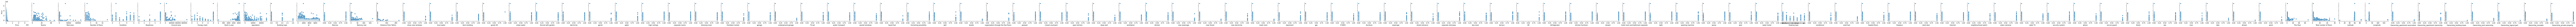

In [73]:
import seaborn as sns

sns.pairplot(data, 
             x_vars=data.columns,
             y_vars='Price', 
             kind='scatter')

In [74]:
data.corr(method ='pearson')

,Price,Rooms,Total area,Number of floors,Condition,Readiness,Ground area,Energy mark,Built in year,population,Building type,id,Balcony,Balcony size,Distance from Tallinn,show case windows,local water,farm building,goods lift,urban water,fenced with garden,electricity,garret,water,high ceilings,separate rooms,dressing room,frontdoor locked,garage,underground garage,TV-set,public transport,packet windows,liquid fuel,furnishing possibility,well,trestle,organisation through the few floors,parquet,closed courtyard,open kitchen,deep well,ventilation,kitchen,new sewerage,near forest,new electricity,cloak room,basement,gas,3*380V,furniture,sewerage,street entrance,separate entryway,box-room,terrace,lift,refridgerator,kitchen furniture,shower,toilet room and bathroom separate,bath,washing machine,sauna,pool,water boiler,conditioner,solid fuel,heated floors,fireplace,steel door,Internet,neighbourhood watch,video cameras,cable TV,security system,phone,secure guard,forest,sea,river,lake,stream,pond,Latitude,Longitude,Ownership_apartment association,Ownership_apartment ownership,Ownership_building lease,Ownership_joint ownership,Ownership_logical part,Ownership_movable,Ownership_private property
Price,1.000000,0.344083,0.096648,0.204978,0.218699,0.025143,0.133151,-0.062101,0.033051,0.063895,-0.109208,-0.086252,0.102642,0.125587,-0.016323,0.057215,-0.018132,0.036305,0.174834,0.237696,0.188782,0.081156,0.033717,0.028980,0.152035,-0.011748,0.261118,-0.087817,0.229394,0.074692,0.048252,0.088470,-0.019889,0.046955,0.053371,-0.015388,0.012853,0.097822,0.164327,0.136848,0.013703,0.040798,0.081733,0.084897,-0.045161,-0.019221,0.021584,0.029366,0.023134,0.138925,0.084545,0.020709,0.090424,0.039481,0.083158,0.067402,0.207458,0.057181,0.079269,0.049106,0.153741,0.145215,0.162416,0.061792,0.291733,0.211167,-0.027775,0.104990,0.009333,0.217763,0.227394,0.069078,0.111543,0.040274,0.146496,0.057460,0.269291,0.061334,0.037060,0.113665,0.174940,-0.006451,-0.040085,-0.014961,0.010997,0.081065,-5.436505e-02,-0.024588,-0.105810,-0.007969,-0.022167,-0.007523,-0.019608,0.128260
Rooms,0.344083,1.000000,0.049663,0.321417,-0.072440,-0.054694,0.128913,0.138157,-0.060688,-0.156243,-0.291252,-0.253706,-0.041070,0.015631,0.014210,0.030973,0.130337,0.167728,-0.001988,0.294225,0.222001,0.053215,0.067795,-0.057643,-0.008167,-0.064881,0.147719,-0.287717,0.160350,-0.032870,-0.005594,0.056465,-0.058087,0.072956,-0.004062,0.134864,0.020013,0.042771,-0.035254,0.020238,-0.173222,0.122885,0.012678,0.036673,-0.176984,-0.066169,-0.104361,0.020980,0.085247,0.015893,0.195143,-0.055725,0.054025,0.028340,0.070079,0.002190,0.147290,-0.124287,-0.025605,-0.025605,-0.003211,0.119146,0.076789,-0.036653,0.270950,0.138986,0.078205,0.071303,0.104043,0.048634,0.202186,-0.094601,-0.026132,0.004681,0.007371,-0.063356,0.105268,-0.005472,0.005858,0.202677,0.033712,0.027021,0.028694,-0.002175,0.022531,-0.024515,-1.107357e-03,-0.012039,-0.322803,0.003090,0.003281,-0.001988,-0.021028,0.341780
Total area,0.096648,0.049663,1.000000,0.022409,-0.054660,-0.015709,0.095683,0.040655,-0.011627,-0.038534,-0.078170,-0.074679,-0.029907,-0.009429,-0.001333,-0.001186,0.031415,0.067918,0.006687,0.002522,0.009788,0.006269,-0.001155,-0.024422,-0.012928,-0.033194,0.001488,-0.051864,0.015894,-0.008400,-0.004458,-0.005433,-0.019656,0.004114,-0.014103,0.083485,0.001568,-0.010026,-0.042238,-0.012792,-0.036998,0.078562,-0.015105,-0.014420,-0.034806,-0.014333,-0.030225,0.000153,-0.006490,-0.013296,0.027693,-0.015146,-0.002878,-0.003958,-0.009640,-0.027092,-0.005691,-0.026840,-0.015617,-0.019184,-0.025950,-0.020707,-0.032379,-0.012479,0.038236,0.010297,0.026073,-0.001165,-0.000481,-0.024994,0.037722,-0.036368,-0.029230,-0.021205,-0.008723,-0.027703,-0.005861,-0.014246,-0.002724,0.080679,-0.011969,0.021947,0.015345,-0.000978,0.023180,-0.012430,2.552935e-03,-0.003317,-0.073868,0.001355,-0.006403,-0.000706,-0.002604,0.064047
Number of floors,0.204978,0.321417,0.022409,1.000000,-0.069554,-0.035651,0.069827,0.153535,-0.014636,-

In [75]:
# Find the highest abs correlations.
pairwise_correlations = data.corr(method ='spearman').abs()
pairwise_correlations.values[np.triu_indices_from(pairwise_correlations, 0)] = np.nan
top_correlations = pairwise_correlations["Price"].sort_values(ascending=False).head(10)

In [76]:
top_correlations

Condition        0.506614
Total area       0.475260
Rooms            0.472891
heated floors    0.414437
sauna            0.400776
parquet          0.343252
dressing room    0.340042
urban water      0.321018
terrace          0.304513
shower           0.289583
Name: Price, dtype: float64

<AxesSubplot:ylabel='Price'>

Text(0, 0.5, 'Correlation to price')

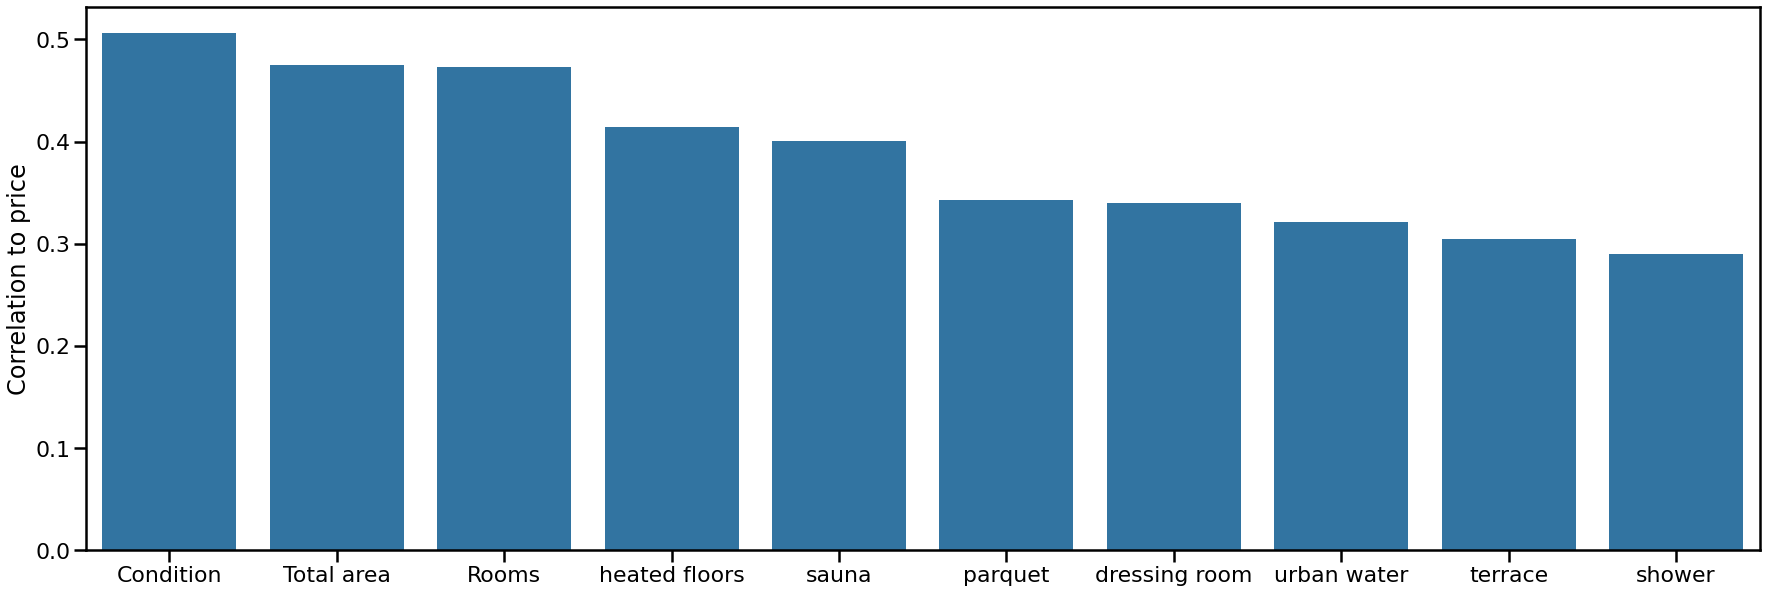

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("poster")
plt.rc("font", size=14)

fig, ax = plt.subplots(figsize=(30, 10))
sns.barplot(x=top_correlations.index, y=top_correlations, color="tab:blue")
plt.ylabel("Correlation to price")

plt.savefig("Correlation.pdf")

In [78]:
data.Condition

0      0
1      6
2      5
3      5
4      5
      ..
496    5
497    5
498    5
499    6
500    6
Name: Condition, Length: 7208, dtype: int64

In [79]:
data_original = data.copy()
remap_column(data, "Condition", {6: 'All brand-new', 5: 'Good condition', 0: 'Needs renovating', 1: 'Satisfactory', 2: 'Sanitary renovation needed', 4: 'Renovated', 3: 'Sanitary renovation done'})
data["Condition"].unique()

array(['Needs renovating', 'All brand-new', 'Good condition',
       'Sanitary renovation needed', 'Renovated', 'Satisfactory',
       'Sanitary renovation done'], dtype=object)

0      Needs renovating
1         All brand-new
2        Good condition
3        Good condition
4        Good condition
             ...       
496      Good condition
497      Good condition
498      Good condition
499       All brand-new
500       All brand-new
Name: Condition, Length: 7208, dtype: object

<AxesSubplot:xlabel='Condition', ylabel='Price'>

(0.0, 1000000.0)

([<matplotlib.axis.YTick at 0x19b072ffeb0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

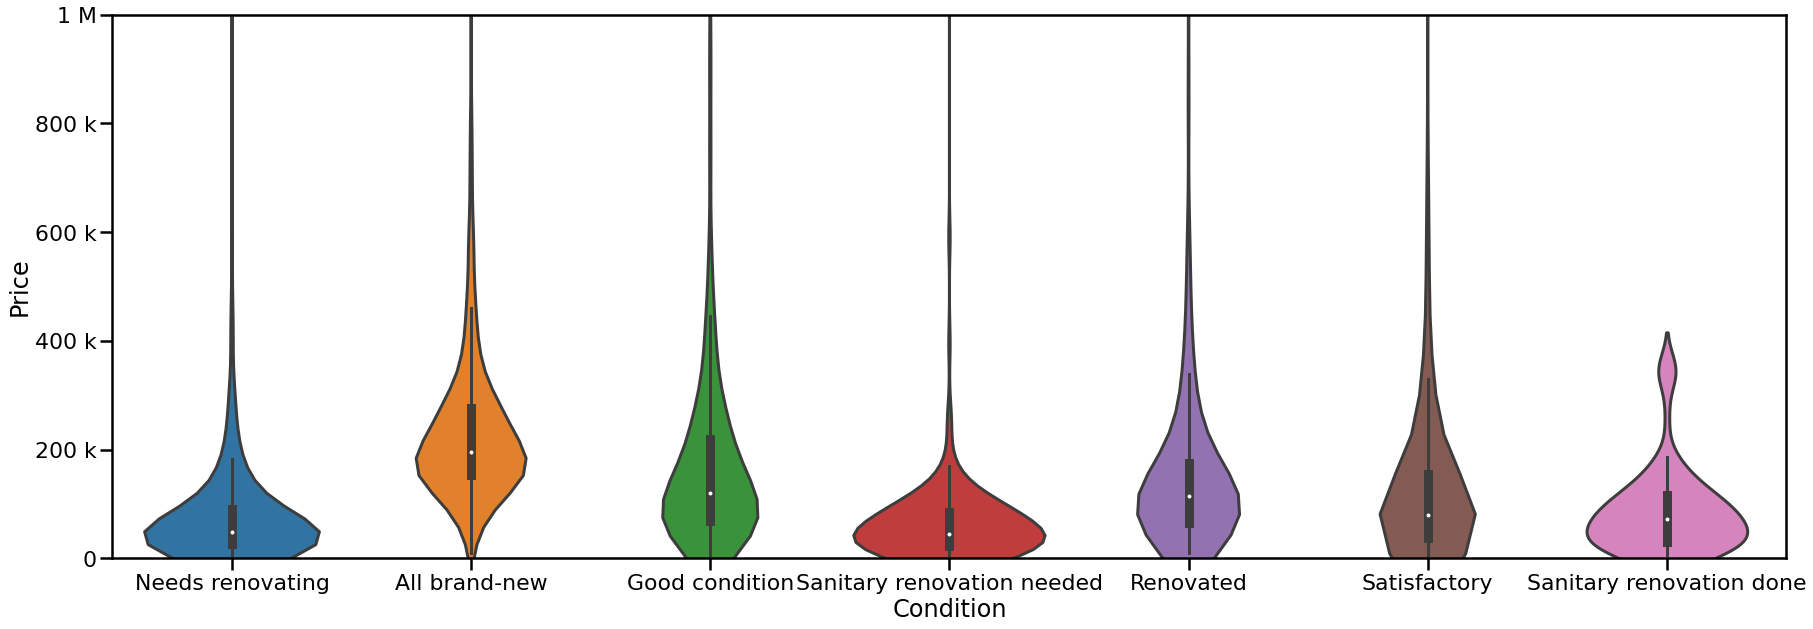

In [80]:
import matplotlib.ticker as ticker

data.Condition
sns.set_context("poster")
plt.rc("font", size=14)

fig, ax = plt.subplots(figsize=(30, 10))
# sns.catplot(data=data, kind="violin", x="Condition", y="Price", split=True)
sns.violinplot(x=data.Condition, y=data.Price)
plt.ylim((0, 1000000))
plt.yticks([0, 200000, 400000, 600000, 800000, 1000000])
# plt.ticklabel_format(style="plain")
ax.yaxis.set_major_formatter(ticker.EngFormatter())

plt.savefig("Condition.pdf")

## Save the cleaned data

In [84]:
data.to_csv("data/cleaned_data.csv", index=False)